## Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


## Import Datasets

In [6]:
# Import Training Data Set
df_train_1 = pd.read_csv(r'Data\Train\Data_illustrated_CSV.csv')
df_train_2 = pd.read_csv(r'Data\Train\corridor_CSV\July22_51.csv')                  
df_train_3 = pd.read_csv(r'Data\Train\corridor_CSV\July22_59.csv')  

df_train_4 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_2.csv')    
df_train_5 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_4.csv')    
df_train_6 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_7.csv')    
df_train_7 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_8.csv')    
df_train_8 = pd.read_csv(r'Data\Train\Open_Box_CSV_files\Aug14_Box_9.csv')    

df_train_9 = pd.read_csv(r'Data\Train\special_CSV\Aug16_Box_special_1.csv')    

# create datasets
df_train_1.columns = df_train_2.columns = df_train_3.columns = df_train_4.columns = df_train_5.columns = df_train_6.columns = df_train_7.columns = df_train_8.columns = df_train_9.columns 

# ==============================================================================

# Import Testing Data Set
df_test_1 = pd.read_csv(r'Data\Test\Aug14_Box_g1.csv')
df_test_2 = pd.read_csv(r'Data\Test\Aug14_Box_g2.csv')
df_test_3 = pd.read_csv(r'Data\Test\Aug14_Box_3.csv')
df_test_4 = pd.read_csv(r'Data\Test\Aug14_Box_5.csv')
df_test_5 = pd.read_csv(r'Data\Test\Aug14_Box_11.csv')

df_test_6 = pd.read_csv(r'Data\Test\July22_22.csv')
df_test_7 = pd.read_csv(r'Data\Test\July22_33.csv')
df_test_8 = pd.read_csv(r'Data\Test\July22_66.csv')

# df_test_1.columns = df_test_2.columns =
df_test_3.columns = df_test_4.columns = df_test_5.columns
df_test_6.columns = df_test_7.columns = df_test_8.columns

# ==============================================================================




## Select Training and Testing Pairs

In [18]:
# possible training set
box_train = [df_train_4, df_train_5, df_train_6, df_train_7, df_train_8]
corridor_train = [df_train_1, df_train_2, df_train_3]

# possible test set
box_test = [df_test_3, df_test_4, df_test_5]
corridor_test =  [df_test_6, df_test_7, df_test_8]

# ==================================================
df_train = box_train
df_test = df_test_5
# ==================================================

print(type(box_train))
print(type(corridor_train))
print(type(box_test))
print(type(corridor_test))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


## Training Data 

In [12]:

# ====================================================================================

# Combine Training Set                 
df_training = pd.concat(df_train, axis=0, ignore_index=True)

# Shuffle Dataset
df_training = shuffle(df_training)

# Reduce Laser Data
laser_df = pd.DataFrame()
bins_sz = 15*4
bin_list = np.arange(0,1080,bins_sz)
for c in bin_list:    # loop every 40 columns
    laser_df[c/bins_sz] = df_training.iloc[:,c:c+bins_sz].astype(float).mean(axis=1)
laser_df.shape

# Extract Useful Features [laser, local goal, pose]
laser = np.array(laser_df)  
local_goal = np.array(df_training)[:,1084:1088]                  
pose = np.array(df_training)[:,1088:1092]                  
features = np.concatenate((laser,local_goal,pose), axis=1)

# Extract Predictions
cmd_vel = np.array(df_training)[:,1092:]    

# Initialize Training Set Inputs
X_training = features
y_training = cmd_vel
y_training_vel = cmd_vel[:,0:1]
y_training_ang = cmd_vel[:,1:]

# Print Training Input Shapes
print("==================================================================")
print(" laser features shape --> ", laser.shape)  
print(" total training features shape --> ", X_training.shape)  
print(" total training translation velocity predictions shape --> ", y_training_vel.shape)  
print(" total training angular velocity predictions shape --> ", y_training_ang.shape) 
print("==================================================================")


 laser features shape -->  (69773, 18)
 total training features shape -->  (69773, 26)
 total training translation velocity predictions shape -->  (69773, 1)
 total training angular velocity predictions shape -->  (69773, 1)


# Training / Validation Split

In [13]:

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

y_train_vel = y_train[:,0:1]
y_train_ang = y_train[:,1:]

y_val_vel = y_val[:,0:1]
y_val_ang = y_val[:,1:]

# Print Training Input Shapes
print("==================================================================")
print(" training features shape --> ", X_train.shape)  
print(" training translation velocity predictions shape --> ", y_train_vel.shape)  
print(" training angular velocity predictions shape --> ", y_train_ang.shape) 
print("==================================================================")
# Print Training Input Shapes
print(" validation features shape --> ", X_val.shape)  
print(" validation translation velocity predictions shape --> ", y_val_vel.shape)  
print(" validation angular velocity predictions shape --> ", y_val_ang.shape) 
print("==================================================================")


 training features shape -->  (52329, 26)
 training translation velocity predictions shape -->  (52329, 1)
 training angular velocity predictions shape -->  (52329, 1)
 validation features shape -->  (17444, 26)
 validation translation velocity predictions shape -->  (17444, 1)
 validation angular velocity predictions shape -->  (17444, 1)


# Testing Data

In [17]:
df_test = pd.DataFrame (df_test)

# Reduce Laser Data
laser_df_test = pd.DataFrame()

for c in bin_list:    # loop every 40 columns
    laser_df_test[c/bins_sz] = df_test.iloc[:,c:c+bins_sz].astype(float).mean(axis=1)
laser_df_test.shape
                  
# Extract Useful Features [laser, local goal, pose]
laser = np.array(laser_df_test)  
local_goal = np.array(df_test)[:,1084:1088]                  
pose = np.array(df_test)[:,1088:1092]                  
features = np.concatenate((laser,local_goal,pose), axis=1)

# Extract Predictions
cmd_vel = np.array(df_test)[:,1092:]  

# Initialize Testing Set Inputs
X_test = features
y_test = cmd_vel
y_test_vel = cmd_vel[:,0:1]
y_test_ang = cmd_vel[:,1:]

# Print Testing Input Shapes
print(" test features shape --> ", X_test.shape)  
print(" test translation velocity predictions shape --> ", y_test_vel.shape)  
print(" test angular velocity predictions shape --> ", y_test_ang.shape) 

c:\Users\Jai Sharma\CondaFiles\envs\ml_env\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: setting an array element with a sequence.

## Scale Training and Testing Data

In [58]:
scale = StandardScaler()
scale.fit(X_train)

x_train_scaled = scale.transform(X_train)
x_test_scaled =  scale.transform(X_test)
x_val_scaled =  scale.transform(X_val)

# Comment out to predict v and w together
# y_train = y_train_vel
# y_test = y_test_vel
# y_val = y_val_vel 

# Comment out to predict v and w together
y_train = y_train_ang
y_test = y_test_ang
y_val = y_val_ang 

# Stochastic Gradient Descent Regression

In [59]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import RandomizedSearchCV

Train Model

In [60]:
sgd_reg = SGDRegressor()                              # Uses Default Values

sgd_reg.fit(x_train_scaled, y_train.ravel())

# sgd_reg.get_params()

SGDRegressor()

In [61]:

# Prediction
sgd_pred_train = sgd_reg.predict(x_train_scaled)
sgd_pred_test = sgd_reg.predict(x_test_scaled)

# In Sample and Out of Sample Error [MSE and R^2]
print('MSE train: %.4f, test: %.4f' % (mean_squared_error(y_train_vel, sgd_pred_train, squared = True), mean_squared_error(y_test_vel, sgd_pred_test, squared = True)))
print('R^2 train: %.4f, test: %.4f' % (r2_score(y_train_vel, sgd_pred_train), r2_score(y_test_vel, sgd_pred_test)))

MSE train: 0.2279, test: 0.2456
R^2 train: -0.7511, test: -0.7779


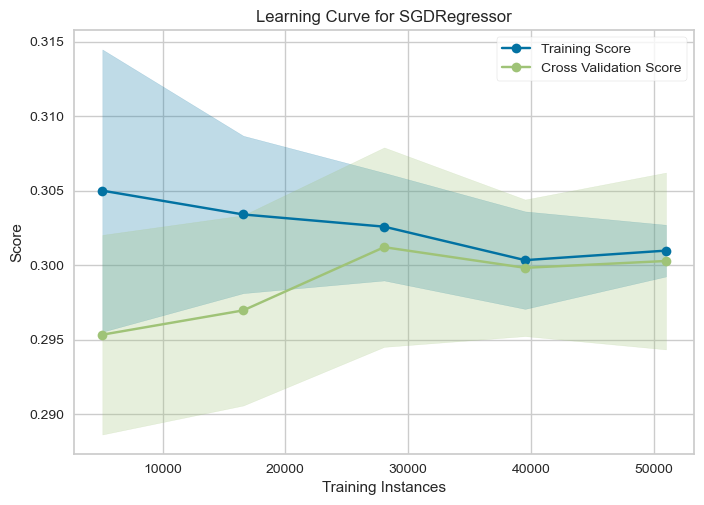

<AxesSubplot:title={'center':'Learning Curve for SGDRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [76]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Instantiate the regression model and visualizer
visualizer = LearningCurve(sgd_reg, scoring='r2')

visualizer.fit(x_train_scaled, y_train_vel.ravel())        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure


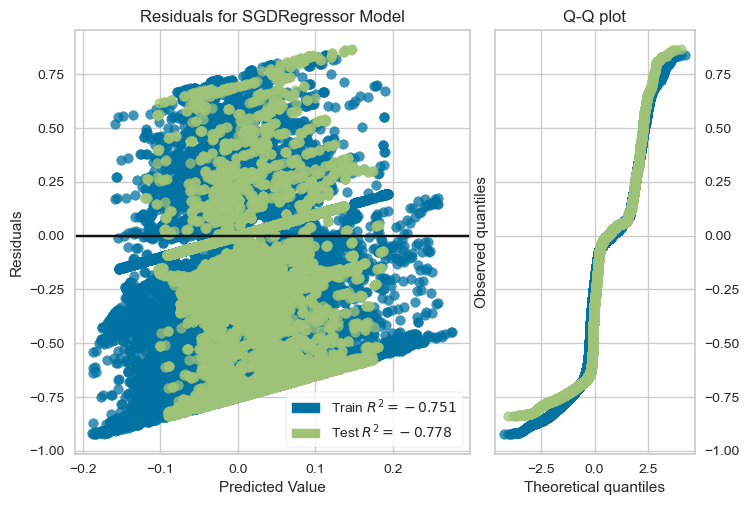

<AxesSubplot:title={'center':'Residuals for SGDRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [63]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(sgd_reg, hist=False, qqplot=True)

visualizer.fit(x_train_scaled, y_train_vel.ravel())  # Fit the training data to the visualizer
visualizer.score(x_test_scaled, y_test_vel.ravel())  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Learning Curve

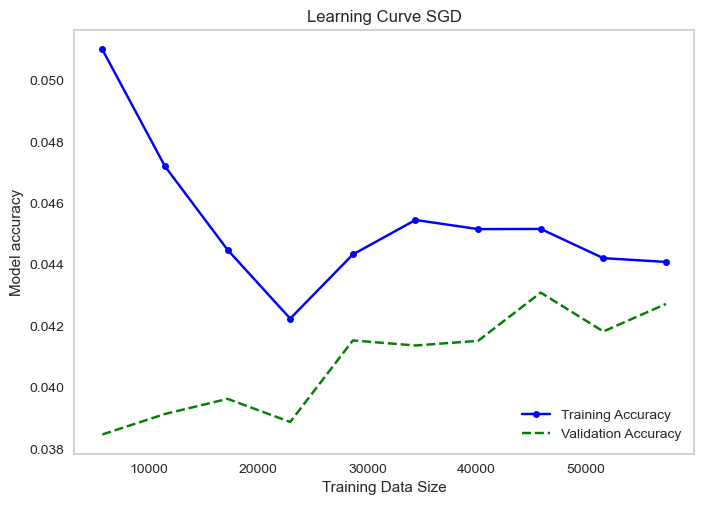

In [64]:

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=sgd_reg, X=x_train_scaled, y=y_train.ravel(),
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10, 100),
                                                       n_jobs=1)
# Calculate training and test mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.title('Learning Curve SGD')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Tune Hyperparameters

In [65]:

params = {
    "max_iter" : [500, 1000, 2000, 3000, 4000, 5000],
    "penalty" : ['l1', 'l2'],
    "alpha" : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    "loss" : [ 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], 
    "learning_rate" : ['constant', 'optimal', 'invscaling', 'adaptive'], 
    "eta0" : [0.001, 0.01, 0.1, 1,  10, 100]
}



In [66]:
# perform hyperparameter tuning on validation set

best_sgd = RandomizedSearchCV(estimator=sgd_reg, param_distributions=params, n_jobs=-1, cv=5, scoring='r2')
best_sgd.fit(x_val_scaled, y_val_vel.ravel())

RandomizedSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
                   param_distributions={'alpha': [1e-05, 0.0001, 0.001, 0.01,
                                                  0.1, 1.0],
                                        'eta0': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['squared_error', 'huber',
                                                 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': [500, 1000, 2000, 3000,
                                                     4000, 5000],
                                        'penalty': ['l1', 'l2']},
                   scoring='r2')

In [67]:
print("best score:", best_sgd.best_score_)

best score: 0.28927203855043493


In [68]:
print("best_param:")
best_sgd.best_params_

best_param:


{'penalty': 'l1',
 'max_iter': 2000,
 'loss': 'squared_error',
 'learning_rate': 'adaptive',
 'eta0': 10,
 'alpha': 1e-05}

In [69]:
# Prediction
sgd_pred_train = best_sgd.predict(x_train_scaled)
sgd_pred_test = best_sgd.predict(x_test_scaled)

# In Sample and Out of Sample Error [MSE and R^2]
print('MSE train: %.4f, test: %.4f' % (mean_squared_error(y_train_vel, sgd_pred_train, squared = True), mean_squared_error(y_test_vel, sgd_pred_test, squared = True)))
print('R^2 train: %.4f, test: %.4f' % (r2_score(y_train_vel, sgd_pred_train), r2_score(y_test_vel, sgd_pred_test)))

MSE train: 0.0909, test: 0.1099
R^2 train: 0.3016, test: 0.2044


In [70]:


# Instantiate the regression model and visualizer
# visualizer = LearningCurve(best_sgd, scoring='r2')

# visualizer.fit(x_train_scaled, y_train_vel.ravel())        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

In [71]:
# from sklearn.model_selection import learning_curve

# train_sizes, train_scores, test_scores = learning_curve(estimator=best_sgd, X=x_train_scaled, y=y_train.ravel(),
#                                                        cv=10, train_sizes=np.linspace(0.1, 1.0, 10, 100),
#                                                        n_jobs=1)
# # Calculate training and test mean and std
# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)
# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# # Plot the learning curve
# plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
# plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
# plt.title('Learning Curve SGD')
# plt.xlabel('Training Data Size')
# plt.ylabel('Model accuracy')
# plt.grid()
# plt.legend(loc='lower right')
# plt.show()